## Chapter 3

## Problem 1

Show that the F statistic (3.13) for dropping a single coefficient
from a model is equal to the square of the corresponding z-score (3.12).

$p_1-p_0=1$, $RSS = (Y-X\beta)^T(Y-X\beta)$, 

$\frac{(RSS_0-RSS_1)}{RSS_1/(N-p_1-1)} = \beta_j^2/(\sigma^2(X^TX)_j)$

## Problem 2

Given data on two variables X and Y , consider fitting a cubic
polynomial regression model $f(X) =
\sum^3_{j=0} \beta_jX_j$. In addition to plotting
the fitted curve, you would like a 95% confidence band about the curve.
Consider the following two approaches:
1. At each point x_0, form a 95% confidence interval for the linear function
$a^T\beta =\sum^3_{j=0} \beta_jx_j$

2. Form a 95% confidence set for β as in (3.15), which in turn generates
confidence intervals for f(x0).

How do these approaches differ? Which band is likely to be wider? Conduct
a small simulation experiment to compare the two methods.


The first approach consider percentile for normal distribution for each $\beta$. The second approach we consider percentile for chi distribution for set of $\beta$s. I would expect second band to be wider all beta contribute at the same time.

In [32]:
X=rnorm(20)
Y = 2*X+X^2+0.6*X^3+rnorm(20)
df = data.frame(X, Y)
head(df)

X,Y
1.99676405,12.5180369
0.14887276,1.1051888
0.02975812,-0.9762164
-0.10232201,-2.0374831
1.30950677,5.1682533
-1.64164290,-4.0566385


In [33]:
m = lm(Y~X+I(X^2)+I(X^3), data=df)
confint(m)

,2.5 %,97.5 %
(Intercept),-1.1396592,-0.01312149
X,0.9334383,3.42163117
I(X^2),0.5351249,1.51890494
I(X^3),0.1749300,0.97235379


In [34]:
summary(m)


Call:
lm(formula = Y ~ X + I(X^2) + I(X^3), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6461 -0.4081 -0.1458  0.4246  2.1160 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.5764     0.2657  -2.169 0.045470 *  
X             2.1775     0.5869   3.710 0.001900 ** 
I(X^2)        1.0270     0.2320   4.426 0.000424 ***
I(X^3)        0.5736     0.1881   3.050 0.007639 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9701 on 16 degrees of freedom
Multiple R-squared:  0.978,	Adjusted R-squared:  0.9739 
F-statistic: 237.1 on 3 and 16 DF,  p-value: 1.812e-13


In [35]:
m = lm(Y~poly(X,3), data=df)
confint(m)

,2.5 %,97.5 %
(Intercept),1.8172327,2.736903
"poly(X, 3)1",22.5039022,26.616793
"poly(X, 3)2",5.5220314,9.634923
"poly(X, 3)3",0.9022406,5.015132


In [36]:
summary(m)


Call:
lm(formula = Y ~ poly(X, 3), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6461 -0.4081 -0.1458  0.4246  2.1160 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2771     0.2169  10.498 1.39e-08 ***
poly(X, 3)1  24.5603     0.9701  25.318 2.46e-14 ***
poly(X, 3)2   7.5785     0.9701   7.812 7.53e-07 ***
poly(X, 3)3   2.9587     0.9701   3.050  0.00764 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9701 on 16 degrees of freedom
Multiple R-squared:  0.978,	Adjusted R-squared:  0.9739 
F-statistic: 237.1 on 3 and 16 DF,  p-value: 1.812e-13


At least if to consider poly function the confidence intervals are wider for the same error

## Problem 3

Gauss–Markov theorem:
(a) Prove the Gauss–Markov theorem: the least squares estimate of a
parameter $a^T$β has variance no bigger than that of any other linear
unbiased estimate of $a^T$β (Section 3.2.2).

Let take estimater which differs from least square estimator by bector $b^T$. So that

$E(c^T Y) = E(a^T\beta+b^TY) = E(a^T\beta) + E(b^tX\beta)$

because we have unbias estimator 

$=a^T\beta$ Eq.(3.18)

$b^TX = 0$, taking this into account to remove cross products

$(c^Ty) = c^TVar(y)c = \sigma^2 c^Tc = Var(a^T\beta - b^TY)(a^T \beta - b^TY)^T = \sigma^2 (a^Ta/(X^TX)+b^Tb) > Var(a^T\beta)$

(b) The matrix inequality B =< A holds if A − B is positive semidefinite.
Show that if $\hat{V}$ is the variance-covariance matrix of the least squares
estimate of β and $V$ is the variance-covariance matrix of any other
linear unbiased estimate, then $\hat{V} =< V$.

Positive semidefinite $X^T(A-B)X >= 0$ for any real X. $\hat{V} = E(a^T\beta a\beta^T)-E(a^T\beta)E(a\beta^T)$, $V = E(c^T\beta c\beta^T)-E(c^T\beta)E(c\beta^T)$ from part (a) = $\hat{V}+E(b^Tb)>=\hat{V}$

## Problem 4

Show how the vector of least squares coefficients can be obtained
from a single pass of the Gram–Schmidt procedure (Algorithm 3.1). Represent
your solution in terms of the QR decomposition of X.

By definition $\beta=X^TY/(XX^{T})$, $x_j =z_j + \sum_{k=1}^{j-1} \gamma_{jk}z_k $ or $X=Z\Gamma$

QR dicomposition: $X=QR$, where Q is orthogonal matrix, R is upper triangular matrix, Z=QD, $\Gamma=D^{-1}R$, D is diagonal matrix.

$\beta = Q^TR^TY/(QRQ^{T}R^{T})=Q^TY/R$

Using that R is upper triangular matrix (see also wiki QR decomposition)
$r_{pp}\beta_{p} = <q_{p}, y>$

$\beta_{p} = <z_p, y>/||z_{p}||^2$

Substituting back for equation for $\beta_j$,

$r_{p-1, p-1}\beta_{p-1} +r_{p-1, p}\beta_p=<q_p, y>$  

$\beta_{p-1} +\gamma_{p-1,p}\beta_p=<z_{p-1}, y>/||z_{p-1}||^2$  

## Problem 5

Consider the ridge regression problem (3.41). Show that this problem
is equivalent to the problem

$\hat{\beta^c}= argmin_{\beta_c}{(\sum_{i=1}^{N}(y_i-\beta_0^c-\sum_{j=1}^p(x_{ij}-\bar{x}_j)\beta^c_j)^2+\lambda\sum_{j=1}^p\beta_j^{c2})}$

Give the correspondence between βc and the original β in (3.41). Characterize
the solution to this modified criterion. Show that a similar result
holds for the lasso.


We can write $\hat{\beta^c}= argmin_{\beta_c}{(\sum_{i=1}^{N}(y_i-(\beta_0^c-\sum_{j=1}^p\bar{x}_{j})-\sum_{j=1}^px_{ij}\beta^c_j)^2+\lambda\sum_{j=1}^p\beta_j^{c2})}$

$\beta_0 = \beta_0^c-\sum_{j=1}^p\bar{x}_{j}$, $\beta_j=\beta_j^c$ $j>0$

It does not depend on regulization term if it does not contain $\beta_0$

## Problem 6

Show that the ridge regression estimate is the mean (and mode)
of the posterior distribution, under a Gaussian prior $\beta ~ N(0, \tau I)$, and
Gaussian sampling model $y ~ N(X\beta, \sigma^2I)$. Find the relationship between
the regularization parameter $\lambda$ in the ridge formula, and the variances $\tau$
and $\sigma^2$.

$\hat{\beta}_R = X^Ty(X^TX+\lambda I)^{-1}$

From Gaussian distribution:

$\hat{\beta}_R = argmax_{\beta}(L(y|\beta)\pi(\beta))$, where L is Gaussian likelyhood, $\pi(\beta)$ is probability, $p(\beta|y)=p(y|\beta)\pi(\beta)$.
Taking log from argument

$\hat{\beta}_R = argmax_{\beta}(-(y-X\beta)^T(y-X\beta)/\sigma^2-\beta^T\beta/\tau^2)=argmin_{\beta}((\beta^TX^TX\beta-\beta^TX^Ty-y^TX\beta)/\sigma^2+\beta^T\beta/\tau^2)$ 

If gradient by $\beta$ in argmin is 0 we have

$\hat{\beta}_R = X^Ty(X^TX + \sigma^2/\tau^2  I)^{-1}$

## Problem 7

## Problem 8

Consider the QR decomposition of the uncentered N × (p + 1)
matrix X (whose first column is all ones), and the SVD of the N × p
centered matrix $\hat{X}$. Show that Q2 and U span the same subspace, where
Q2 is the sub-matrix of Q with the first column removed. Under what
circumstances will they be the same, up to sign flips?

Q is orthoganal matrix the columns of Q are $q_1, .., q_{p+1}$.  By QR decomposition $span(q_i,... q_j) = span(x_i, ..,x_j), 1<=j<=p+1$ or for Q2 if we shift indexes by -1  $span(q_i,... q_j) = span(x_i, ..,x_j), 1<=j<=p$ (1)

We can write $\hat{x}_i = \sum_{j<i} a_jq_j$, so $span(q_1, .., q_i)=span(x_1,.., x_i)$ (2)
For SVD $span(u_1,.., u_p) = span(\hat{x}_1,.., \hat{x}_p)$ (3). Therefore from (1) -(3) $span(q_i,... q_j) = span(u_1,.., u_p)$, Q2 and U span the same subspace.

If $sign(\hat{x_i})=sign(x_i)$(X is without original first column) for any $i$ they must be the same up to sign flip.

## Problem 9

Forward stepwise regression. Suppose we have the QR decomposition
for the N×q matrix X1 in a multiple regression problem with response
y, and we have an additional p−q predictors in the matrix X2. Denote the
current residual by r. We wish to establish which one of these additional
variables will reduce the residual-sum-of squares the most when included
with those in X1. Describe an efficient procedure for doing this.

Add $X_{21}$ to matrix $X_{1}$, do QR decomposition, find $\beta$ and new residual r. Compare it to initial r if r get smaller save $X_{21}$ and corresponding sum. Try the same on next, compare with the current saved smallest r. Do it for all predictors in $X_2$. This way find which predictor has smallest r.

## Problem 10

Backward stepwise regression. Suppose we have the multiple regression
fit of y on X, along with the standard errors and Z-scores as in
Table 3.2. We wish to establish which variable, when dropped, will increase
the residual sum-of-squares the least. How would you do this?

Consider most of p-1 models removing 1 feature. Choose model with smallest  residual sum-of-squares. I would start from highest absolute value of z score, but not rely too much on it. If the residual sum-of-squares really started to increase more for smaller Z score and Z scores distribution does not change much in new models, then it may be Ok not to check features with smallest  scores.

## Problem 11

Show that the solution to the multivariate linear regression problem (3.40) is given by (3.39). What happens if the covariance matrices $\sum_i$
are different for each observation?

If we have the same $\epsilon_k$ for all observations it does not participate in $\sum_i$, minimizing $RSS(B, \sum)$ we come
again to equation $X^T\sum^{-1}(Y-X\hat{B}) = 0$ in case if $\sum$ is independent from $i$, $\hat{B}=X^TY/(X^TX)$. If $\sum_ik$
are deferent for different i, we have like different weights in equation and we must leave $\sum$ in it  $\hat{B}=X^T\sum^{-1}Y/(X^TX)$

## Problem 12

Show that the ridge regression estimates can be obtained by
ordinary least squares regression on an augmented data set. We augment
the centered matrix X with p additional rows $\sqrt{\lambda}I$, and augment y with p
zeros. By introducing artificial data having response value zero, the fitting
procedure is forced to shrink the coefficients toward zero. This is related to
the idea of hints due to Abu-Mostafa (1995), where model constraints are
implemented by adding artificial data examples that satisfy them.

Loss function is $\sum_{j=1}^{N+p}\sum_{k=0}^p(y_{j}-x_{jk}\beta_k)^2=\sum_{j=1}^{N}\sum_{k=0}^p(y_{j}-x_{jk}\beta_k)^2+\sum_{j=N+1}^{N+p}\lambda(\sum_{k=0}^p I_{jk}\beta_k)^2 =\sum_{j=1}^{N}\sum_{k=0}^p(y_{j}-x_{jk}\beta_k)^2+\sum_{k=0}^p\lambda\beta_k^2$

## Problem 13

Derive the expression (3.62), and show that $\hat{\beta}_{pcr}(p) = \hat{\beta}_{ls}$.

$z_m = Xv_m$, substituting in (3.61) we get $\hat{y}_{pcr} =\bar{y}{\bar{1}}+ X\sum_{m=1}^M\hat{\theta}_mv_m$, $\hat{\beta}_{pcr} = \sum_{m=1}^M\hat{\theta}_mv_m = \hat{\beta}_{ls}$, because $\hat{y}_{ls}=\bar{y}{\bar{1}}+X\hat{\beta}_{ls}$

## Problem 14

Show that in the orthogonal case, PLS stops after m = 1 steps,
because subsequent $\hat{\phi}_{mj}$ in step 2 in Algorithm 3.3 are zero.

Consider $x_j^{(m)}$, equation in part 2(d). In orthogonal case in part 2 (d) of Algorithm 3.3 we obtain that in $<z_m, x_j^{(m-1)}>=\hat{\phi}_{mj}x_j^{(m-1)2}$, m=2, we have only this component. Then $<x_j^{(m)},y> = <x_j^{(m-1)},y>-(\hat{\phi}_{mj}x_j^{(m-1)2}<z_m, y>)/\sum_{j=1}^p{\hat{\phi}_{mj}^2x_j^{(m-1)2}}=\hat{\phi}_{mj}-\hat{\phi}_{mj}=0$, $z_m = \sum_{j=1}^p \phi_{mj}x^{(m-1)}_j$.

## Problem 15

Verify expression (3.64), and hence show that the partial least
squares directions are a compromise between the ordinary regression coefficient
and the principal component directions.

Algorithm 3.3 is maximization of covariance matrix $max arg_{||\alpha=1||}cov(Y, \alpha X)^2 = max arg_{||\alpha=1||} corr(Y, \alpha X)^2Var(Y) Var(\alpha X)$) (*)

$cov_{||\alpha=1||}(Y, \alpha X)^2 = \alpha^TX^TYY^TX\alpha |_{\alpha=1}$

Condition of maximum eigen value and eigen vector pair of this symmetic matrix $X^TYY^TX$  is (*)

In Algorithm 3.3 $\phi_{mj}$ are products $<x_{j}, y>$, we find eigen values and vectors, at the end $\phi_{mj}$ = 0 we come to (*) and 3.64.


## Problem 16

Derive the entries in Table 3.4, the explicit forms for estimators
in the orthogonal case.

In orthogonal case $XX^T =1$ therefore

The best subset is just linear estimator with condition based on best set $\beta_i>=\beta_{(M)}$,

$X^TY/(X^TX)=\hat{\beta}_iI(\hat{\beta}_i>=\hat{\beta}_{(M)})$

In the Ridge case

Minimizing Loss function is $(Y-X\beta_j)^2 + \lambda \beta_{j}^2$, take derivative by $\beta$,

$X^TY-\beta_j - \lambda\beta_j = 0$ -> estimator $\beta_j=X^TY/(1+\lambda)=\hat{\beta}_j/(1+\lambda)$

For Lasso:

Minimizing Loss function is $(Y-X\beta_j)^2 + \lambda \beta_{j}$, take derivative by $\beta$,

$X^TY-\beta_j - \lambda = 0$ -> estimator $ \beta_j =X^TY-\lambda= \hat{\beta}_j-\lambda=sign(\hat{\beta}_j)(\hat{\beta}_j-\lambda)_+$

## Problem 17

Repeat the analysis of Table 3.3 on the spam data discussed in
Chapter 1.

In [249]:
install.packages("pls", repos='http://cran.us.r-project.org')
library(kernlab)
library(data.table)
data(spam)
head(spam)
library(leaps)
library(glmnet)
library ("MASS")
library ("pls")

package 'pls' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kuzn1\AppData\Local\Temp\RtmpOqA4vz\downloaded_packages


make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,spam
0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,spam
0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,spam
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,spam
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,spam
0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,spam


Warning message:
"package 'pls' was built under R version 3.6.3"
Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



In [84]:
regsubplot=function(reg.sum){
    par(mfrow = c(2, 2))
    plot(1:20, reg.sum$adjr2, type="b", col="blue", xlab = "Model", ylab = "R2")
    plot(1:20, reg.sum$cp, type="b", col="blue",xlab = "Model", ylab = "C_p")
    plot(1:20, reg.sum$bic, type="b", , col = "blue", xlab = "Model", ylab = "BIC")
   }

I'm going to predict "your", it is one of the word that occurrence changes much depending on spam or not.

In [168]:
l=dim(spam)[1]
test=sample(seq(l), 1000, replace = FALSE)
#spam=data.table(spam)
colnames(spam)
#sapply(spam, class)
spam=as.data.table(spam)

#dim(spam[type=='spam'])[1] 
spam$typen = 0
spam$typen[spam_n$type=="spam"] = 1
spam_n=spam[, -c("type")]
spam_test = spam_n[test,]
spam_train = spam_n[-test,]
head(spam_n)

[1] "make"              "address"           "all"              
 [4] "num3d"             "our"               "over"             
 [7] "remove"            "internet"          "order"            
[10] "mail"              "receive"           "will"             
[13] "people"            "report"            "addresses"        
[16] "free"              "business"          "email"            
[19] "you"               "credit"            "your"             
[22] "font"              "num000"            "money"            
[25] "hp"                "hpl"               "george"           
[28] "num650"            "lab"               "labs"             
[31] "telnet"            "num857"            "data"             
[34] "num415"            "num85"             "technology"       
[37] "num1999"           "parts"             "pm"               
[40] "direct"            "cs"                "meeting"          
[43] "original"          "project"           "re"               
[46] "edu"               "table"             "conference"       
[49] "charSemicolon"     "charRoundbracket"  "charSquarebracket"
[52] "charExclamation"   "charDollar"        "charHash"         
[55] "capitalAve"        "capitalLong"       "capitalTotal"     
[58] "type"              "typen"

make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,typen
0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1
0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,1


### Linear regression

In [170]:
ls <- lm (typen~.-1, spam_n)
summary(ls)


Call:
lm(formula = typen ~ . - 1, data = spam_n)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.56714 -0.16513 -0.01664  0.20251  1.07421 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
make              -3.321e-02  1.730e-02  -1.919 0.055015 .  
address            1.445e-03  3.831e-03   0.377 0.706027    
all                6.887e-02  1.023e-02   6.729 1.92e-11 ***
num3d              1.488e-02  3.569e-03   4.170 3.10e-05 ***
our                1.045e-01  7.724e-03  13.529  < 2e-16 ***
over               1.557e-01  1.890e-02   8.240 2.24e-16 ***
remove             2.361e-01  1.339e-02  17.640  < 2e-16 ***
internet           1.148e-01  1.292e-02   8.888  < 2e-16 ***
order              9.540e-02  1.954e-02   4.883 1.08e-06 ***
mail               2.442e-02  8.015e-03   3.047 0.002325 ** 
receive            4.260e-02  2.708e-02   1.573 0.115727    
will              -2.967e-03  5.911e-03  -0.502 0.615696    
people             4.462e-02  1.711e-0

### Best subset (backward)

In [241]:
nvmax = 30
reg.fit=regsubsets(typen~.-1, data=spam_n,  method="backward", nvmax = nvmax) # "backwards" specified to speed up
reg.sum=summary(reg.fit)
reg.sum

Subset selection object
Call: regsubsets.formula(typen ~ . - 1, data = spam_n, method = "backward", 
    nvmax = nvmax)
56 Variables  (and intercept)
                  Forced in Forced out
address               FALSE      FALSE
all                   FALSE      FALSE
num3d                 FALSE      FALSE
our                   FALSE      FALSE
over                  FALSE      FALSE
remove                FALSE      FALSE
internet              FALSE      FALSE
order                 FALSE      FALSE
mail                  FALSE      FALSE
receive               FALSE      FALSE
will                  FALSE      FALSE
people                FALSE      FALSE
report                FALSE      FALSE
addresses             FALSE      FALSE
free                  FALSE      FALSE
business              FALSE      FALSE
email                 FALSE      FALSE
you                   FALSE      FALSE
credit                FALSE      FALSE
your                  FALSE      FALSE
font                  FALSE    

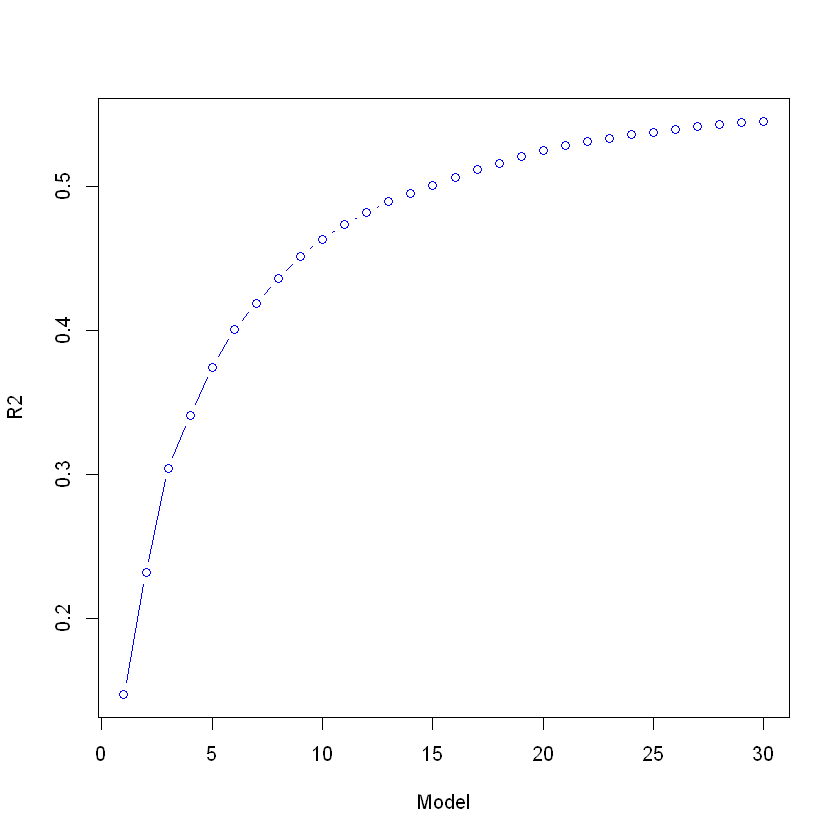

In [242]:
 plot(1:nvmax, reg.sum$adjr2, type="b", col="blue", xlab = "Model", ylab = "R2")

In [243]:
modelsMSE = function(reg.fit, formula, df, out,  n){
    df.mat = model.matrix(formula, data = df, nvmax = n)
    val.mse = rep(NA, n)
    for (i in 1:n) {
        coef= coef(reg.fit, id = i)
        pred = df.mat[, names(coef)] %*% coef
        val.mse[i] = mean((pred - out)^2)
    }
    return(val.mse)
}

In [231]:
coef = coef(reg.fit, id=nvmax)
coef

(Intercept)             all             our            over          remove 
   1.754060e-01    3.880469e-02    8.739913e-02    1.222176e-01    2.252767e-01 
       internet           order            will            free        business 
   1.017827e-01    8.348318e-02   -2.696706e-02    7.702075e-02    5.346891e-02 
          email             you          credit            your            font 
   5.421986e-02    1.647742e-02    6.666231e-02    5.533247e-02    4.981888e-02 
         num000           money              hp             hpl          george 
   1.838949e-01    8.816159e-02   -2.416828e-02   -2.775868e-02   -1.120210e-02 
           data         meeting        original         project              re 
  -4.560202e-02   -4.236128e-02   -8.690578e-02   -3.177912e-02   -3.592084e-02 
            edu      conference   charSemicolon charExclamation      charDollar 
  -4.038109e-02   -5.841955e-02   -1.481656e-01    7.006176e-02    2.389618e-01 
   capitalTotal 
   9.225017e-05

### Ridge

[1] 0.08297008

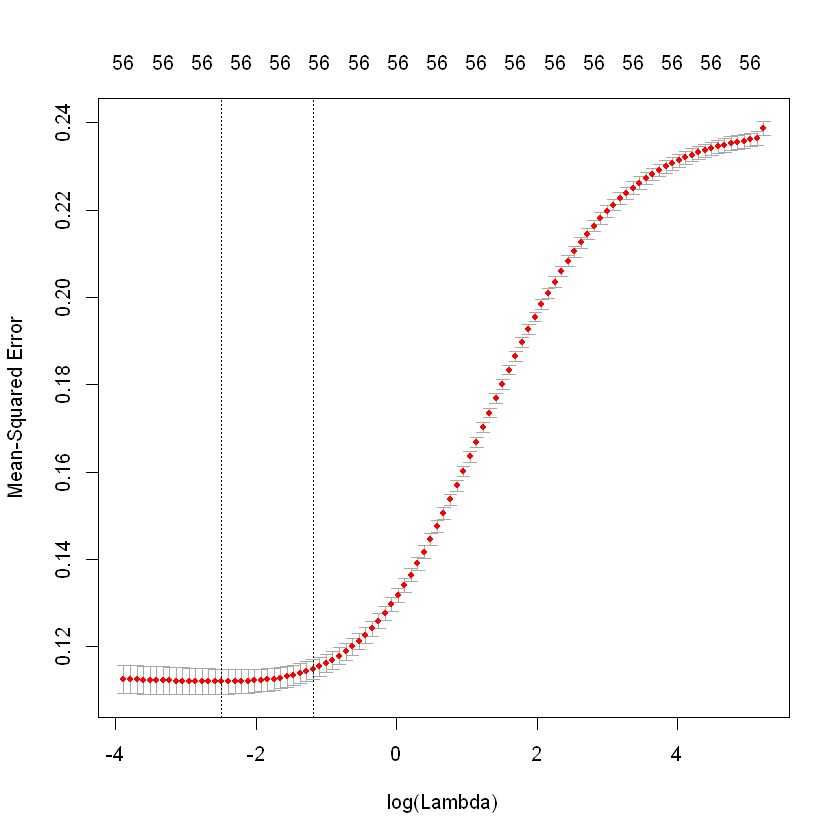

In [237]:
X = model.matrix(typen ~ .-1, spam_n)[,-1]
ridge.mod = glmnet(X, spam_n$typen, alpha=0,  lambda=seq(0.01, 1, by = 0.05))
cv.ridge = cv.glmnet(X, spam_n$typen, alpha=0)
plot(cv.ridge)
bestlam=cv.ridge$lambda.min
bestlam

In [238]:
ridge.pred=predict(ridge.mod, s=bestlam, newx=X[test,])
mean((ridge.pred-spam_test$typen)^2)
ridge.mod = glmnet(X, spam_n$typen, alpha=0,  lambda=bestlam)
coef(ridge.mod)

[1] 0.1111246

57 x 1 sparse Matrix of class "dgCMatrix"
                             s0
(Intercept)        2.045961e-01
address           -9.987873e-03
all                3.951851e-02
num3d              1.084271e-02
our                7.564560e-02
over               1.140962e-01
remove             1.913853e-01
internet           8.789169e-02
order              7.194410e-02
mail               1.584215e-02
receive            6.562422e-02
will              -2.375881e-02
people             1.863612e-02
report             7.852027e-03
addresses          3.471682e-02
free               6.822427e-02
business           5.649567e-02
email              5.199150e-02
you                1.480581e-02
credit             5.808434e-02
your               4.742905e-02
font               3.694583e-02
num000             1.562075e-01
money              7.978391e-02
hp                -2.089995e-02
hpl               -2.259855e-02
george            -1.074220e-02
num650            -2.244529e-03
lab               -8.814404e-0

### Lasso

[1] 0.001232079

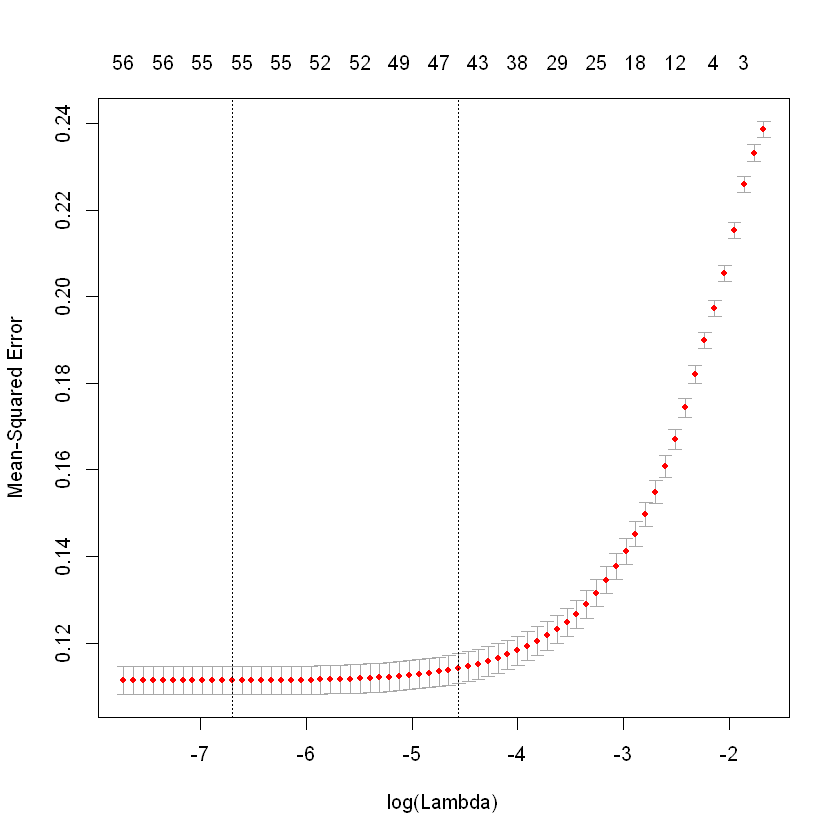

In [239]:
lasso.mod = glmnet(X, spam_n$typen, alpha=1,  lambda=seq(0.01, 1, by = 0.05))
cv.lasso = cv.glmnet(X, spam_n$typen, alpha=1)
plot(cv.lasso)
bestlam=cv.lasso$lambda.min
bestlam

In [240]:
lasso.pred=predict(lasso.mod, s=bestlam, newx=X[test,])
mean((lasso.pred-spam_test$typen)^2)
lasso.mod = glmnet(X, spam_n$typen, alpha=1,  lambda=bestlam)
coef(lasso.mod)

[1] 0.1139529

57 x 1 sparse Matrix of class "dgCMatrix"
                             s0
(Intercept)        1.960860e-01
address           -1.060908e-02
all                3.802224e-02
num3d              1.109774e-02
our                8.365492e-02
over               1.173409e-01
remove             2.148908e-01
internet           9.498568e-02
order              6.972901e-02
mail               1.431110e-02
receive            4.530274e-02
will              -2.740092e-02
people             9.527623e-03
report             2.002789e-03
addresses          2.004823e-02
free               7.434947e-02
business           5.046285e-02
email              5.363467e-02
you                1.399383e-02
credit             6.186285e-02
your               5.196741e-02
font               4.367510e-02
num000             1.714515e-01
money              8.493971e-02
hp                -2.267737e-02
hpl               -2.109145e-02
george            -1.167486e-02
num650             .           
lab               -2.869286e-0

### PCR

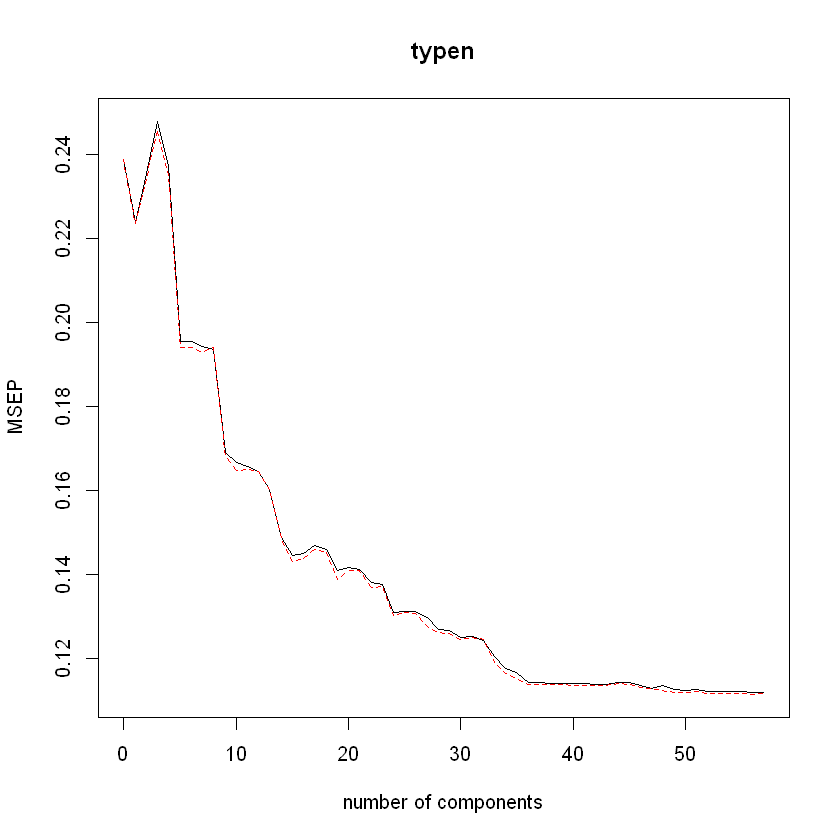

In [251]:
pcr.fit = pcr(typen~.-1, data=spam_n, validation = 'CV')
validationplot(pcr.fit, val.type="MSEP")

In [253]:
coef(pcr.fit)

, , 57 comps

                          typen
make              -4.981903e-02
address           -1.204624e-02
all                3.927858e-02
num3d              1.191729e-02
our                8.420772e-02
over               1.188405e-01
remove             2.129405e-01
internet           9.398890e-02
order              7.247403e-02
mail               1.506740e-02
receive            5.685672e-02
will              -2.785949e-02
people             1.190404e-02
report             4.859980e-03
addresses          1.852452e-02
free               7.506136e-02
business           5.171571e-02
email              5.539792e-02
you                1.413337e-02
credit             6.172198e-02
your               5.269373e-02
font               4.476700e-02
num000             1.748004e-01
money              9.089079e-02
hp                -2.317497e-02
hpl               -2.162895e-02
george            -1.220160e-02
num650             3.987416e-03
lab               -7.449544e-03
labs              -5.194838e-02
telnet            -2.329398e-02
num857             6.331760e-03
data              -4.198342e-02
num415             5.114177e-02
num85             -3.116872e-02
technology         2.648006e-02
num1999           -3.321252e-02
parts             -5.343861e-02
pm                -1.975460e-02
direct             4.076089e-02
cs                -8.364086e-03
meeting           -3.692652e-02
original          -6.323898e-02
project           -3.238003e-02
re                -3.525328e-02
edu               -3.781411e-02
table             -1.951774e-01
conference        -5.822294e-02
charSemicolon     -1.401025e-01
charRoundbracket  -5.995936e-02
charSquarebracket -5.905158e-02
charExclamation    6.805299e-02
charDollar         2.331780e-01
charHash           2.769343e-02
capitalAve         2.326708e-04
capitalLong        6.675382e-05
capitalTotal       7.986219e-05

It looks like the more components the less is error.

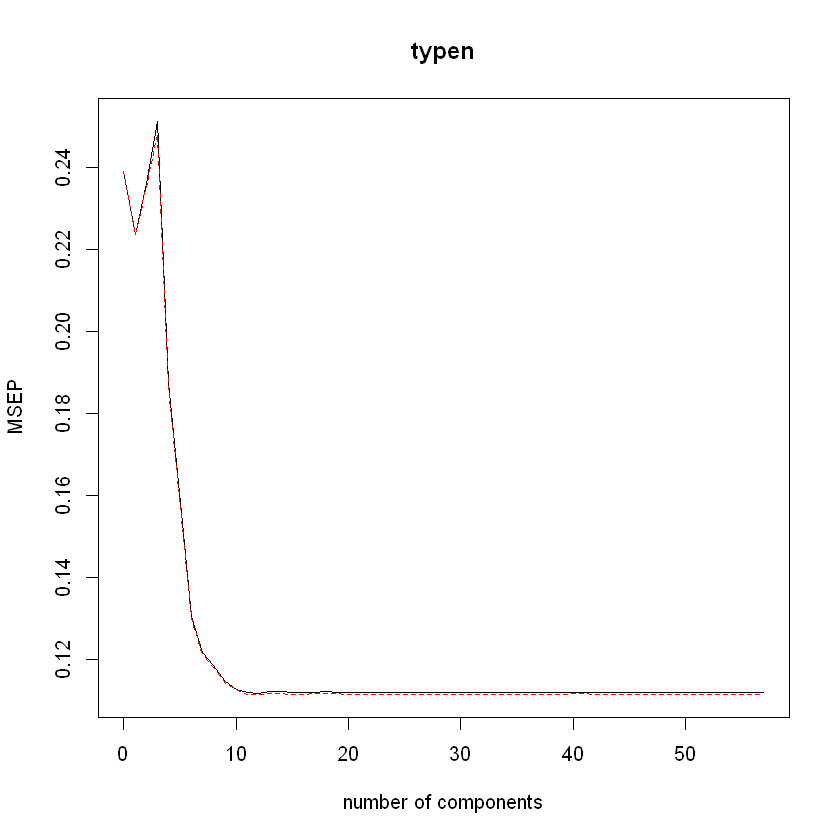

In [256]:
plsr.fit <- plsr( formula = typen~.-1, data = spam_n, validation ="CV")
validationplot(plsr.fit, val.type="MSEP")

In [267]:
coef(pls.fit)

, , 57 comps

                          typen
make              -4.981903e-02
address           -1.204624e-02
all                3.927858e-02
num3d              1.191729e-02
our                8.420772e-02
over               1.188405e-01
remove             2.129405e-01
internet           9.398890e-02
order              7.247403e-02
mail               1.506740e-02
receive            5.685672e-02
will              -2.785949e-02
people             1.190404e-02
report             4.859980e-03
addresses          1.852452e-02
free               7.506136e-02
business           5.171571e-02
email              5.539792e-02
you                1.413337e-02
credit             6.172198e-02
your               5.269373e-02
font               4.476700e-02
num000             1.748004e-01
money              9.089079e-02
hp                -2.317497e-02
hpl               -2.162895e-02
george            -1.220160e-02
num650             3.987416e-03
lab               -7.449544e-03
labs              -5.194838e-02
telnet            -2.329398e-02
num857             6.331760e-03
data              -4.198342e-02
num415             5.114177e-02
num85             -3.116872e-02
technology         2.648006e-02
num1999           -3.321252e-02
parts             -5.343861e-02
pm                -1.975460e-02
direct             4.076089e-02
cs                -8.364086e-03
meeting           -3.692652e-02
original          -6.323898e-02
project           -3.238003e-02
re                -3.525328e-02
edu               -3.781411e-02
table             -1.951774e-01
conference        -5.822294e-02
charSemicolon     -1.401025e-01
charRoundbracket  -5.995936e-02
charSquarebracket -5.905158e-02
charExclamation    6.805299e-02
charDollar         2.331780e-01
charHash           2.769343e-02
capitalAve         2.326708e-04
capitalLong        6.675382e-05
capitalTotal       7.986219e-05

I do not see too noticeable change in coefficients. The best choice lambda in Ridge and Lasso are relatively small.

## Problem 18

Read about conjugate gradient algorithms (Murray et al., 1981, for
example), and establish a connection between these algorithms and partial
least squares.

Conjugate gradient algorithm https://en.wikipedia.org/wiki/Conjugate_gradient_method is the same as Algorithm 3.3
Conjugate gradient algorithm is for solving Eq. $Y= Xb$.

We'll try to show that PLS estimator $\hat{b}_{PLS}^{s} = W_s(V_s^TW_s)^{-1}T_s^Ty$ is the same as $\hat{b}_{CG}$, where PLS weights are $w_s=X^T_{i-1}y_{i-1}/||X_{i-1}^Ty||, ||X_{i-1}^Ty||=\sqrt{X_{i-1}^Ty_{i-1}y_{i-1}^TX_{i-1}}$, $t_s=X_{i-1}^Tw_s/||X_{i-1}^Tw_s||$, $v_s=X_{i-1}^Tt_s$. 


Residual $r_0=X^Ty-X^TXb_0$, $p_0=X^Ty$, 
$b_0=0$,
$a_i=r_i^Tr_i/(p_i^TX^TXp_i)$,

$b_{i+1}=b_i+a_ir_i$,
$r_{i+1}=r_i-a_iXp_i$

$\beta_k = r^T_kr_{k+1}/(r^T_kr_k)$

$p_{k+1}=r_{k+1}+\beta_kp_k$

$r_i^Tr_j =0$, $p_i^TAp_j =0$
r and p span the same Krylov subspace $K(X^TX, X^TY)$.

From equation above and identical spans for p and r

$\hat{b}_{GC}^{(s)} = P_{S}(P_{S}^TXXP_{S})^{-1}P_{S}^TX^Ty$

From Eq. for PLS weights and $Sp(W_S)$ is identical to $Sp(P_S)$

$\hat{b}_{GC} = \hat{b}_{PLS}$


## Problem 19

Show that $||\hat{\beta}^{ridge}_k||$ increases as its tuning parameter λ → 0. Does
the same property hold for the lasso and partial least squares estimates?
For the latter, consider the “tuning parameter” to be the successive steps
in the algorithm.

For ridge minimum $X^TY-\beta_j - \lambda\beta_j = 0$ as we showed estimator is $\beta_j=X^TY/(1+\lambda)$, its absolute value decreasing as lambda increases and otherwise. 

For Lasso $\beta_j =X^TY-\lambda$, the effect is the same

For PLS absolute $y^{(m)}$ increases with number of step increase from algorithm description, so $y^{(m)} = \hat{\beta}(m) X$,
absolute value of $\beta$ increases. 

## Problem 20

Consider the canonical-correlation problem (3.67). Show that the
leading pair of canonical variates u1 and v1 solve the problem
$max_{u^T (Y^TY)u=1, v^T (X^TX)v=1}(u^T (Y^TX)v)$, (3.86)
a generalized SVD problem. Show that the solution is given by $u_1 =(Y^TY)^{-1/2}u^*_1$, and $v_1 = (X^TX)^{-1/2}v^*_1$, 
where $u^*_1$ and $v^*_1$ are the leading left
and right singular vectors in $(Y^TY)^{-1/2}(Y^TX)(X^TX)^{-1/2} = U^*D^*V^{*T}$. (3.87)
Show that the entire sequence $u_m$, $v_m$, m = 1, . . . ,min(K, p) is also given
by (3.87).

First components has best correlation by definition $argmax_{u_1, v_1}(Corr^2(Yu_1Xv_1))=argmax\left((Yu_1)^TXv_1/\left(\sqrt{(Yu_1)^TYu_1}\sqrt{(Xv_1)^T_1Xv_1}\right)\right)=
argmax\left(u_1^TY^TXv_1/\left(\sqrt{u_1^TY^TYu_1}\sqrt{(v_1^TX^T_1Xv_1}\right)\right)$
It solves (3.86).
The columns of Yu and Xv are crossorthogonal. That is,
$u^TY^TXv = D^*$ re (3.87), using conditions in (3.86), where $D^*$ is diagonal matrix. Whole sequence is orthogonal and can be similar obtained by (3.87)

